## Make disorder figure
This notebook makes the disorder plot and requires


1. numpy
2. matplotlib

It also requires two Holehouse lab packages for sequence analysis:

3. [shephard](https://shephard.readthedocs.io/) - our sequence analysis framework for working with large sequence datasets.
4. [metapredict](https://metapredict.readthedocs.io/) - our deep-learning based disorder predictor

In [2]:
import numpy as np
import matplotlib

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
	
# Set such that PDF fonts export in a manner that they
# are editable in illustrator/affinity
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

# set to define axes linewidths
matplotlib.rcParams['axes.linewidth'] = 0.5

# this defines some prefactors so inline figures look nice
# on a retina macbook. These can be commented out without any
# issue and are solely asthetic.
%matplotlib inline
%config InlineBackend.figure_format='retina'

# UPDATE 2020-12-31 (my preferred font is Avenir...)
font = {'family' : 'arial',
    	'weight' : 'normal'}

matplotlib.rc('font', **font)
import metapredict as meta

In [3]:
from shephard.apis.uniprot import uniprot_fasta_to_proteome
from shephard.interfaces import si_domains, si_tracks

In [4]:
ap = uniprot_fasta_to_proteome('data/ataxin2_uniprot.fasta')
si_domains.add_domains_from_file(ap,'data/shprd_domains.tsv')
si_tracks.add_tracks_from_file(ap,'data/shprd_track.tsv',mode='values')
p = ap.protein('Q99700')

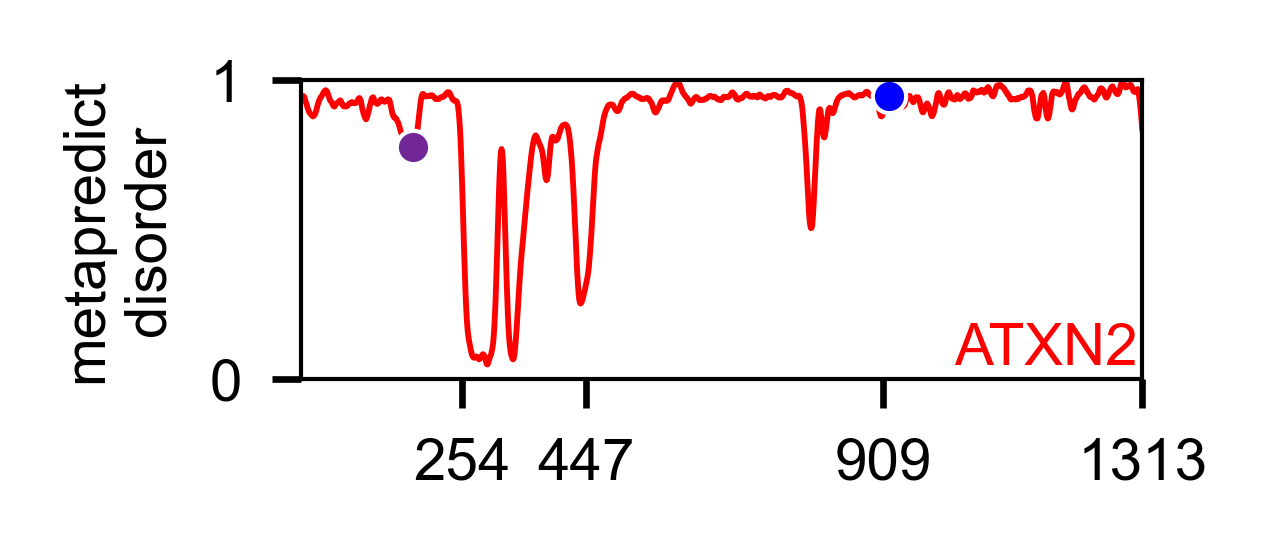

In [10]:
figure(num=None, figsize=(2.2193, 1.0246), dpi=300, facecolor='w', edgecolor='k')
ax = plt.gca()

idx = np.arange(1,len(p)+1)

# smoothe to avoid jiggly and guide eye (no material impact on profile at all)
disorder = savgol_filter(meta.predict_disorder(p.sequence),15,2)

idrs = meta.predict_disorder_domains(p.sequence)

plt.plot(idx, disorder, linewidth=0.7, color='r')
plt.xlim([idx[1], idx[-1]])
plt.xticks([254,447,909, 1313],[254,447,909, 1313],fontsize=7)

# find polyQ region
idx_polyQ = p.sequence.find('QQQQQQQQ') # start of polyQ motif in 0-indexed position

# 11 = 50% of polyQ length
plt.plot(1+idx_polyQ + 11, disorder[idx_polyQ + 11],'o', color='#712896',mew=0.5,ms=4,mec='w')

# find PAM2
PAM2_seq='LNPNAKEFNP'
pam2_index = p.sequence.find(PAM2_seq) + int(len(PAM2_seq)*0.5)
plt.plot(1+pam2_index, disorder[pam2_index],'o', color='blue',mew=0.5,ms=4,mec='w')


## uncomment for lines as fiducial markers for figure making 

# IDR1
#plt.plot([1,254],[0.2,0.2],'-k',linewidth=0.8)

# Lsm/AD
#plt.plot([254, 447],[0.25,0.25],'-k',linewidth=0.8)

# Lsm/AD
#plt.plot([447, 909],[0.3,0.3],'-k',linewidth=0.8)

#plt.plot([909, 1313],[0.35,0.35],'-k',linewidth=0.8)

ax = plt.gca()
#ax.axvspan()

plt.ylim([0,1])
plt.yticks([0,1],fontsize=7)
plt.ylabel('metapredict\ndisorder',fontsize=7)
plt.text(1020, 0.05, 'ATXN2', color='r', fontsize=7)
plt.tight_layout()
plt.savefig('figures/disorder_panel.pdf')